# Budget Analysis

---

## Environment Setup

In [138]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [139]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [140]:
# Set environment variables from the .env file
load_dotenv()

True

In [141]:
api_key=os.getenv("plaid_client")
type(api_key)

str

In [142]:
api_key

'5f12f79d52cdf50011c63e53'

In [143]:
# Extract API keys from environment variables
plaid_client = os.getenv("plaid_client")
plaid_secret = os.getenv("plaid_secret")
plaid_public = os.getenv("plaid_public")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [144]:
# Create the client object
client =plaid.Client(client_id =plaid_client, secret=plaid_secret, public_key=plaid_public, environment="sandbox")
client

In [145]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [146]:
# Create the public token
# Print the public token
token =client.Sandbox.public_token.create(INSITUTION_ID,
                                         ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [147]:
# Retrieve the access token
# Print the access token
exchange =client.Item.public_token.exchange(token['public_token'])
exchange

{'access_token': 'access-sandbox-245f0b1d-5859-4c38-a5ee-61e20edcaa2e',
 'item_id': 'opKzDnw9pqtZqmKLRrBzhd4k3XlzN5uR8bRr7',
 'request_id': '0BCIkZRVTRAjB1Z'}

In [148]:
# Store the access token in a Python variable
access =exchange['access_token']

### 4. Fetch Accounts

In [149]:
# Retrieve accounts
# Print accounts
client.Accounts.get(access)

{'accounts': [{'account_id': 'Nk4ENDrgkzfRDxZn45PQtZK9X5znEycWKNwyb',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'PnPlWDBon3fQDaveP5M4CdqeX5nKRNu7vmRoE',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'jQDW5n8PQyho4eBdgADEcEBpjmLNZwc1Abe6y',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [150]:
# Set the start and end date 90 days from today
# Retrieve the transactions for the last 90 days
# Print the transactions
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access,start_date,end_date)

# Print JSON output
transactions_list = json.dumps(transaction_response['transactions'],indent=4, sort_keys=True)
print(transactions_list)

[
    {
        "account_id": "7zGKbD9lzZiykgm5xE73croDX8L4m7tgpVqdg",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-07-24",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "Tectra Inc",
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
  

### 2. Print the categories for each transaction

In [151]:
# Create a for-loop to print the categories for each transaction
for transaction in transaction_response["transactions"]:
    print(transaction["category"])

['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Avi

### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [153]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
# Retrieve all the transactions
# Populate the transactions DataFrame with the transactions data
# Display sample data from the DataFrame    
data = pd.DataFrame(transaction_response['transactions'], columns=["date", "name", "amount", "category"]) 
data['category'] = data['category'].str.get(0)
data.head()

,date,name,amount,category
0,2020-07-24,Tectra Inc,500.0,Food and Drink
1,2020-07-23,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2,2020-07-23,KFC,500.0,Food and Drink
3,2020-07-23,Madison Bicycle Shop,500.0,Shops
4,2020-07-14,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [154]:
# Display data types
data.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [155]:
# Make any required data type transformation
data['amount'] =data['amount'].astype('float')
data.dtypes

date         object
name         object
amount      float64
category     object
dtype: object

In [164]:
# Set the date column as index
# Display sample data
data['date']= pd.to_datetime(new_df['date']) 
df3 = data.set_index('date')
df3.tail()

,name,amount,category
date,,,
2020-05-12,Starbucks,4.33,Food and Drink
2020-05-11,SparkFun,89.40,Food and Drink
2020-05-10,INTRST PYMNT,-4.22,Transfer
2020-04-30,United Airlines,500.00,Travel
2020-04-28,Uber 072515 SF**POOL**,6.33,Travel


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [157]:
# Fetch de income data
# Print the income data
income = client.Income.get(access)
income["income"]

{'income_streams': [{'confidence': 0.99,
   'days': 690,
   'monthly_income': 500,
   'name': 'UNITED AIRLINES'}],
 'last_year_income': 6000,
 'last_year_income_before_tax': 7285,
 'max_number_of_overlapping_income_streams': 1,
 'number_of_income_streams': 1,
 'projected_yearly_income': 6085,
 'projected_yearly_income_before_tax': 7389}

In [158]:
# Determine the previous year's gross income and print the results
last_year =income['income']['last_year_income_before_tax']
print(last_year)

7285


In [159]:
# Determine the current monthly income and print the results
monthly_income =income['income']['income_streams'][0]['monthly_income']
print(monthly_income)

500


In [160]:
# Determine the projected yearly income and print the results
projected = income['income']['projected_yearly_income_before_tax']
print(projected)

7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [185]:
# Compute the total expenses per category
# Display the expenses per catefory
expenses = df3.groupby("category").sum()["amount"]
expenses

category
Food and Drink     3317.19
Payment            6310.50
Recreation          235.50
Shops              1500.00
Transfer          20537.34
Travel               35.19
Name: amount, dtype: float64

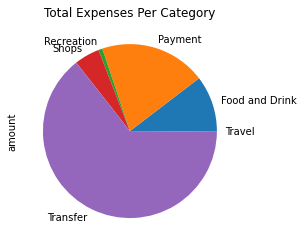

In [186]:
# Create a spending categories pie chart.
expenses.plot.pie(title="Total Expenses Per Category")

### Calculate the expenses per month

In [199]:
# Create a DataFrame with the total expenses
# Display sample data
month = df3.reset_index()
month["month"] = pd.DatetimeIndex(month["date"]).month
month = transactions_per_month.groupby("month").sum()
month

,amount
month,
4,506.33
5,10645.24
6,10645.24
7,10138.91


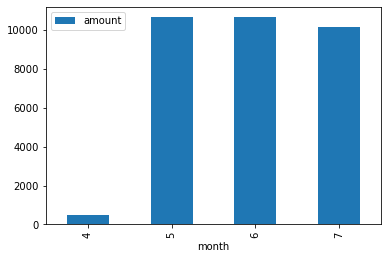

In [200]:
# Create a spending per month bar chart
month.plot.bar()